# ALY 6140: Analytics System Technology
## Capstone Project
### Professor: Dr. Kamen Madjarov
#### Submitted by: Mohit Abbi


In [1]:
# importing libraries for basic operations
import pandas as pd
import numpy as np
import scipy as sp
from Abbi_Mohit_Capstone_Project import data_type, data_info_shape, null_values, data_desc, data_rename, incidentclass_lowercase
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Data Extraction

### Description of the Data
Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from a legacy crime incident report system, which includes multiple fields capturing when, where, and how the incident occurred, as well as who was involved. The records span from 2012 to 2015.

This dataset consists of 20 variables and 255778 observations, 4 numerical variable, 12 character variables and 3 location co-ordinate variable. It also has the old street names coresponding to its new name. This data is well defined with variables having crime description, weapon used, time, day and location where incident has taken place. There are 13 districts in Boston with different reporting area code. There are two variables to distinguish if there was shooting involved in the incident and whether the incident was related to domestic crime. There are 115 crime categories in total.


### Questions intended to answer with this dataset

 - In which year, the crime rate was the highest
 - Weapons used in most reported crimes
 - Top Crimes reported allover Boston
 - Trends of criminal activites in several districts in the period from 2012 to 2015
 - Comparing trends of crime rates in several districts throughout these years
 - Incident Type Description prediction by identifying the predictor variables

In [2]:
# Importing data by url
data_url = 'https://data.boston.gov/dataset/eefad66a-e805-4b35-b170-d26e2028c373/resource/ba5ed0e2-e901-438c-b2e0-4acfc3c452b9/download/crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'
data = pd.read_csv(data_url, dtype = {'COMPNOS' : object, 'REPORTINGAREA' : object, 'Year' : object, 'Month' : object, 'X' : object, 'Y' : object}, low_memory=False)
data

,COMPNOS,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,FROMDATE,WEAPONTYPE,Shooting,DOMESTIC,SHIFT,Year,Month,DAY_WEEK,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location
0,120420285,BERPTA,RESIDENTIAL BURGLARY,05RB,D4,629,07/08/2012 06:00:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,763273.1791,2951498.962,ABERDEEN ST,NaN,"(42.34638135, -71.10379454)"
1,120419202,PSHOT,AGGRAVATED ASSAULT,04xx,B2,327,07/08/2012 06:03:00 AM,Firearm,Yes,No,Last,2012,7,Sunday,Part One,771223.1638,2940772.099,HOWARD AV,NaN,"(42.31684135, -71.07458456)"
2,120419213,ARMROB,ROBBERY,03xx,D4,625,07/08/2012 06:26:00 AM,Firearm,No,No,Last,2012,7,Sunday,Part One,765118.8605,2950217.536,JERSEY ST,QUEENSBERRY ST,"(42.34284135, -71.09698955)"
3,120419223,ALARMC,COMMERCIAL BURGLARY,05CB,B2,258,07/08/2012 06:56:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,773591.8648,2940638.174,COLUMBIA RD,NaN,"(42.3164411, -71.06582908)"
4,120419236,ARMROB,ROBBERY,03xx,E18,496,07/08/2012 07:15:00 AM,Firearm,No,No,Last,2012,7,Sunday,Part One,759042.7315,2923832.681,COLLINS ST,NaN,"(42.27051636, -71.11989955)"
5,120419239,SHOT,ROBBERY,03xx,C11,249,07/08/2012 07:32:00 AM,Firearm,Yes,No,Day,2012,7,Sunday,Part One,777066.0032,2939504.801,SYDNEY ST,NaN,"(42.31328183, -71.0530059)"
6,120419257,ARMROB,ROBBERY,03xx,B2,295,07/08/2012 07:50:00 AM,Firearm,No,No,Day,2012,7,Sunday,Part One,768066.0298,2943456.962,REGENT ST,HERMAN ST,"(42.32425136, -71.08620956)"
7,120419424,THREAT,SIMPLE ASSAULT,08xx,A1,123,07/08/2012 07:50:00 AM,Unarmed,No,No,Day,2012,7,Sunday,Part Two,774083.6785,2952595.797,WASHINGTON ST,NaN,"(42.34924634, -71.06378456)"
8,120419255,REQP,MedAssist,MedAssist,D14,759,07/08/2012 07:53:00 AM,Unarmed,No,No,Day,2012,7,Sunday,Part Three,746474.0254,2953382.196,FANEUIL ST,NaN,"(42.35174635, -71.16590953)"
9,120419274,ALARMI,MedAssist,MedAssist,E18,494,07/08/2012 08:05:00 AM,Unarmed,No,No,Day,2012,7,Sunday,Part Three,759766.2593,2919778.597,RIVER ST,NaN,"(42.25938275, -71.11729354)"


In [3]:
# Data types
data_type(data)

COMPNOS                      object
NatureCode                   object
INCIDENT_TYPE_DESCRIPTION    object
MAIN_CRIMECODE               object
REPTDISTRICT                 object
REPORTINGAREA                object
FROMDATE                     object
WEAPONTYPE                   object
Shooting                     object
DOMESTIC                     object
SHIFT                        object
Year                         object
Month                        object
DAY_WEEK                     object
UCRPART                      object
X                            object
Y                            object
STREETNAME                   object
XSTREETNAME                  object
Location                     object
dtype: object

In [4]:
data_info_shape(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268056 entries, 0 to 268055
Data columns (total 20 columns):
COMPNOS                      255797 non-null object
NatureCode                   266391 non-null object
INCIDENT_TYPE_DESCRIPTION    268056 non-null object
MAIN_CRIMECODE               268056 non-null object
REPTDISTRICT                 267699 non-null object
REPORTINGAREA                268056 non-null object
FROMDATE                     268056 non-null object
WEAPONTYPE                   268056 non-null object
Shooting                     268056 non-null object
DOMESTIC                     268056 non-null object
SHIFT                        255791 non-null object
Year                         268056 non-null object
Month                        268056 non-null object
DAY_WEEK                     268056 non-null object
UCRPART                      268056 non-null object
X                            253075 non-null object
Y                            253075 non-null object
STREE

(None, (268056, 20))

In [5]:
#Null Values
null_values(data)

COMPNOS                       12259
NatureCode                     1665
INCIDENT_TYPE_DESCRIPTION         0
MAIN_CRIMECODE                    0
REPTDISTRICT                    357
REPORTINGAREA                     0
FROMDATE                          0
WEAPONTYPE                        0
Shooting                          0
DOMESTIC                          0
SHIFT                         12265
Year                              0
Month                             0
DAY_WEEK                          0
UCRPART                           0
X                             14981
Y                             14981
STREETNAME                      234
XSTREETNAME                  219374
Location                          0
dtype: int64

In [6]:
# Locating rows with null values in "Streetname" variable
data.loc[data['STREETNAME'].isnull()]

,COMPNOS,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,FROMDATE,WEAPONTYPE,Shooting,DOMESTIC,SHIFT,Year,Month,DAY_WEEK,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location
80371,130355503,VIORDR,Restrain,Restrain,D14,770,06/10/2013 12:00:00 PM,Unarmed,No,No,Day,2013,6,Monday,Part Two,NaN,NaN,NaN,NaN,"(0.0, 0.0)"
255910,NaN,TS,Violations,VAL,NaN,0,06/16/2015 01:39:00 PM,None,No,No,NaN,2015,6,Tuesday,Part Two,NaN,NaN,NaN,COLUMBIA RD,"(0.0, 0.0)"
255912,NaN,IVPER,Warrant Arrests,Arrest,C11,0,06/16/2015 01:56:00 PM,None,No,No,NaN,2015,6,Tuesday,Part Three,NaN,NaN,NaN,INWOOD ST,"(0.0, 0.0)"
256082,NaN,I00040,Robbery,03xx,B2,282,06/17/2015 12:00:00 AM,None,No,No,NaN,2015,6,Wednesday,Part One,768214,2950000,NaN,NaN,"(42.3286628313796, -71.0856340202217)"
256160,NaN,MVA,Violations,VAL,C11,0,06/17/2015 11:23:00 PM,None,No,No,NaN,2015,6,Wednesday,Part Two,NaN,NaN,NaN,GENEVA AVE,"(0.0, 0.0)"
256161,NaN,INJOFF,Medical Assistance,MedAssist,NaN,0,06/17/2015 11:59:00 PM,None,No,No,NaN,2015,6,Wednesday,Part Three,NaN,NaN,NaN,NaN,"(0.0, 0.0)"
256379,NaN,MVA,Violations,VAL,NaN,0,06/18/2015 07:05:00 AM,None,No,No,NaN,2015,6,Thursday,Part Two,NaN,NaN,NaN,PORTER ST,"(0.0, 0.0)"
256382,NaN,MVA,Violations,VAL,C11,0,06/18/2015 08:03:00 AM,None,No,No,NaN,2015,6,Thursday,Part Two,NaN,NaN,NaN,BOWDOIN ST,"(0.0, 0.0)"
256393,NaN,MVA,Motor Vehicle Accident Response,MVAcc,C11,0,06/18/2015 01:49:00 PM,None,No,No,NaN,2015,6,Thursday,Part Three,NaN,NaN,NaN,BOWDOIN ST,"(0.0, 0.0)"
256404,NaN,MVA,Motor Vehicle Accident Response,MVAcc,NaN,0,06/18/2015 06:25:00 PM,None,No,No,NaN,2015,6,Thursday,Part Three,NaN,NaN,NaN,BLUE HILL AVE,"(0.0, 0.0)"


In [7]:
# Description of the data
data_desc(data)

,COMPNOS,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,FROMDATE,WEAPONTYPE,Shooting,DOMESTIC,SHIFT,Year,Month,DAY_WEEK,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location
count,255797,266391,268056,268056,267699,268056,268056,268056,268056,268056,255791,268056,268056,268056,268056,253075,253075,267822,48682,268056
unique,255796,319,127,77,13,886,172958,8,2,1,3,4,12,7,5,23336,18871,4487,3352,23199
top,142052550,LARCRT,VAL,VAL,B2,0,07/23/2015 12:00:00 AM,Unarmed,No,No,Day,2014,7,Friday,Part Two,768218.0809,2950000,WASHINGTON ST,WASHINGTON ST,"(0.0, 0.0)"
freq,2,15999,27363,27591,40640,91211,217,194932,267359,268056,110347,88058,29113,42031,98341,1506,3239,14552,2148,14981


# Data Cleaning

- Renaming the Variables for better understanding
- Removing NUlls from necessary variables
- Converting date variable from object to datetime format

In [8]:
#Renaming variables
data_rename(data)
data.head()

,ReportNumber,NatureCode,IncidentClassification,CrimeCode,REPTDISTRICT,AreaCode,Date,WEAPONTYPE,Shooting,DOMESTIC,SHIFT,Year,Month,Day,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location
0,120420285,BERPTA,RESIDENTIAL BURGLARY,05RB,D4,629,07/08/2012 06:00:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,763273.1791,2951498.962,ABERDEEN ST,NaN,"(42.34638135, -71.10379454)"
1,120419202,PSHOT,AGGRAVATED ASSAULT,04xx,B2,327,07/08/2012 06:03:00 AM,Firearm,Yes,No,Last,2012,7,Sunday,Part One,771223.1638,2940772.099,HOWARD AV,NaN,"(42.31684135, -71.07458456)"
2,120419213,ARMROB,ROBBERY,03xx,D4,625,07/08/2012 06:26:00 AM,Firearm,No,No,Last,2012,7,Sunday,Part One,765118.8605,2950217.536,JERSEY ST,QUEENSBERRY ST,"(42.34284135, -71.09698955)"
3,120419223,ALARMC,COMMERCIAL BURGLARY,05CB,B2,258,07/08/2012 06:56:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,773591.8648,2940638.174,COLUMBIA RD,NaN,"(42.3164411, -71.06582908)"
4,120419236,ARMROB,ROBBERY,03xx,E18,496,07/08/2012 07:15:00 AM,Firearm,No,No,Last,2012,7,Sunday,Part One,759042.7315,2923832.681,COLLINS ST,NaN,"(42.27051636, -71.11989955)"


In [9]:
#Converting the values in "IncidentClassification" variable to lowercase 
incidentclass_lowercase(data)

0                    residential burglary
1                      aggravated assault
2                                 robbery
3                     commercial burglary
4                                 robbery
5                                 robbery
6                                 robbery
7                          simple assault
8                               medassist
9                               medassist
10                               benoprop
11                                    val
12                                  fraud
13                              propfound
14                                 invper
15                                  towed
16                                    val
17                                  towed
18                         weapons charge
19                                invprop
20                              medassist
21                                 invper
22                           drug charges
23                                

In [10]:
data = pd.DataFrame(data)

In [11]:
# Removing NULL valaues from Streetname & REPTDISTRICT variable as we can't fill in those blanks and it has very less count as compared to overall data
data = data.dropna(subset=['STREETNAME'])
data = data.dropna(subset=['REPTDISTRICT'])

In [12]:
# Again, checkinh the variables with null values
null_values(data)

ReportNumber               11857
NatureCode                  1652
IncidentClassification         0
CrimeCode                      0
REPTDISTRICT                   0
AreaCode                       0
Date                           0
WEAPONTYPE                     0
Shooting                       0
DOMESTIC                       0
SHIFT                      11862
Year                           0
Month                          0
Day                            0
UCRPART                        0
X                          14641
Y                          14641
STREETNAME                     0
XSTREETNAME               219179
Location                       0
dtype: int64

In [13]:
# Converting "Date" variable from object data type to datetime
dts = pd.to_datetime(data['Date'], format = '%m/%d/%Y %H:%M:%S %p')
pd.to_datetime(data['Date'], format = '%m/%d/%Y %H:%M:%S %p')

0        2012-07-08 06:00:00
1        2012-07-08 06:03:00
2        2012-07-08 06:26:00
3        2012-07-08 06:56:00
4        2012-07-08 07:15:00
5        2012-07-08 07:32:00
6        2012-07-08 07:50:00
7        2012-07-08 07:50:00
8        2012-07-08 07:53:00
9        2012-07-08 08:05:00
10       2012-07-08 08:10:00
11       2012-07-08 08:15:00
12       2012-07-08 09:00:00
13       2012-07-08 09:30:00
14       2012-07-08 09:30:00
15       2012-07-08 09:45:00
16       2012-07-08 09:47:00
17       2012-07-08 09:53:00
18       2012-07-08 09:55:00
19       2012-07-08 10:00:00
20       2012-07-08 10:00:00
21       2012-07-08 10:00:00
22       2012-07-08 10:00:00
23       2012-07-08 10:00:00
24       2012-07-08 10:01:00
25       2012-07-08 10:34:00
26       2012-07-08 11:00:00
27       2012-07-08 11:00:00
28       2012-07-08 11:09:00
29       2012-07-08 11:10:00
                 ...        
268021   2015-08-09 01:15:00
268023   2015-08-09 02:20:00
268025   2015-08-09 04:22:00
268026   2015-

# Data Visualization

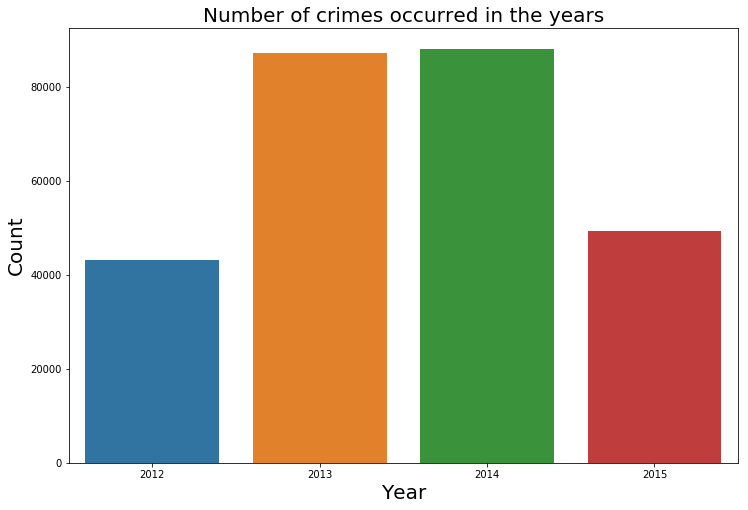

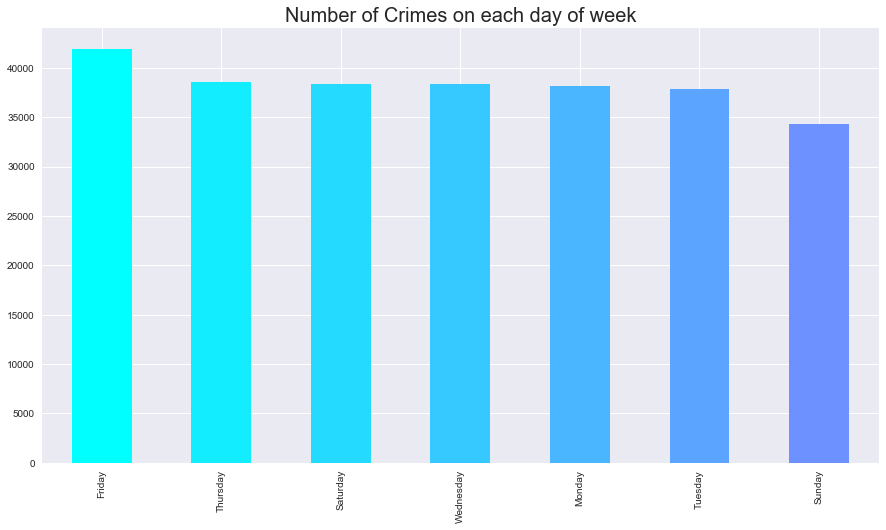

In [14]:
# Number of crime occured from 2012 to 2015 in Boston
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.countplot(x="Year", data=data)
ax.set_title("Number of crimes occurred in the years", fontsize= 20)
plt.xlabel('Year',fontsize= 20)
plt.ylabel('Count',fontsize= 20)
plt.show()

# Number of crimes occured on each day of the week

plt.style.use('seaborn')
color = plt.cm.cool(np.linspace(0, 1, 15))
data['Day'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Number of Crimes on each day of week',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### From the above graphs we can see that Maximum Number of crimes were reported in 2014 and on Friday.

In [15]:
# Short Description of the Weapons used in the crimes
weapon = pd.DataFrame(data.WEAPONTYPE.value_counts())

# Short Description of all the crimes reported in Boston
crime = pd.DataFrame(data.IncidentClassification.value_counts())
print(weapon)
print(crime)

                                    WEAPONTYPE
Unarmed                                 194928
Other                                    52093
None                                     10947
Firearm                                   5291
Knife                                     3867
Personal Weapon (hand  foot  etc.)         276
Knife/Cutting Instrument                   172
Blunt Object                                75
                                  IncidentClassification
val                                                27363
other larceny                                      24443
simple assault                                     18314
medassist                                          17128
vandalism                                          13957
mvacc                                              13832
larceny from motor vehicle                         13254
invper                                             12937
drug charges                                       12042
fraud  

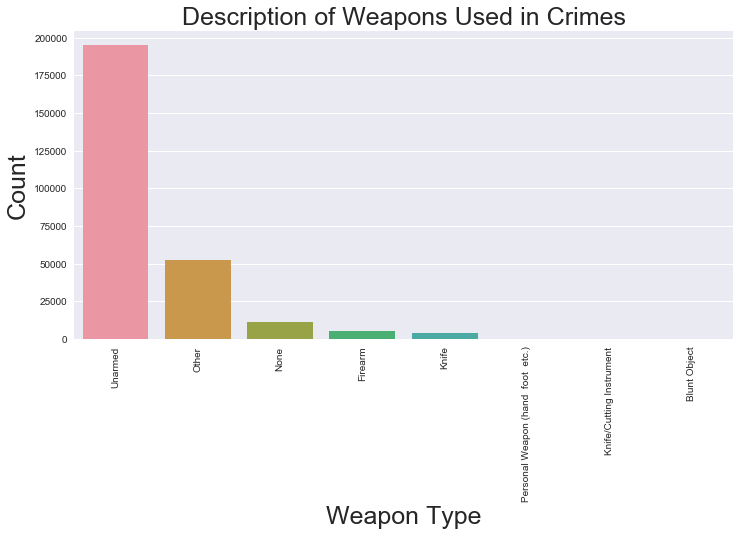

In [16]:
# Weapons used during Crimes

w = sns.catplot('WEAPONTYPE',data=data,kind='count', aspect = 2, order = data['WEAPONTYPE'].value_counts().iloc[:8].index)
plt.title('Description of Weapons Used in Crimes', fontweight = 30, fontsize = 25)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Weapon Type',fontsize= 25)
plt.ylabel('Count',fontsize= 25)
w.set_xticklabels(rotation=90)
plt.show()

### Maximum Number of crimes reported were unarmed.

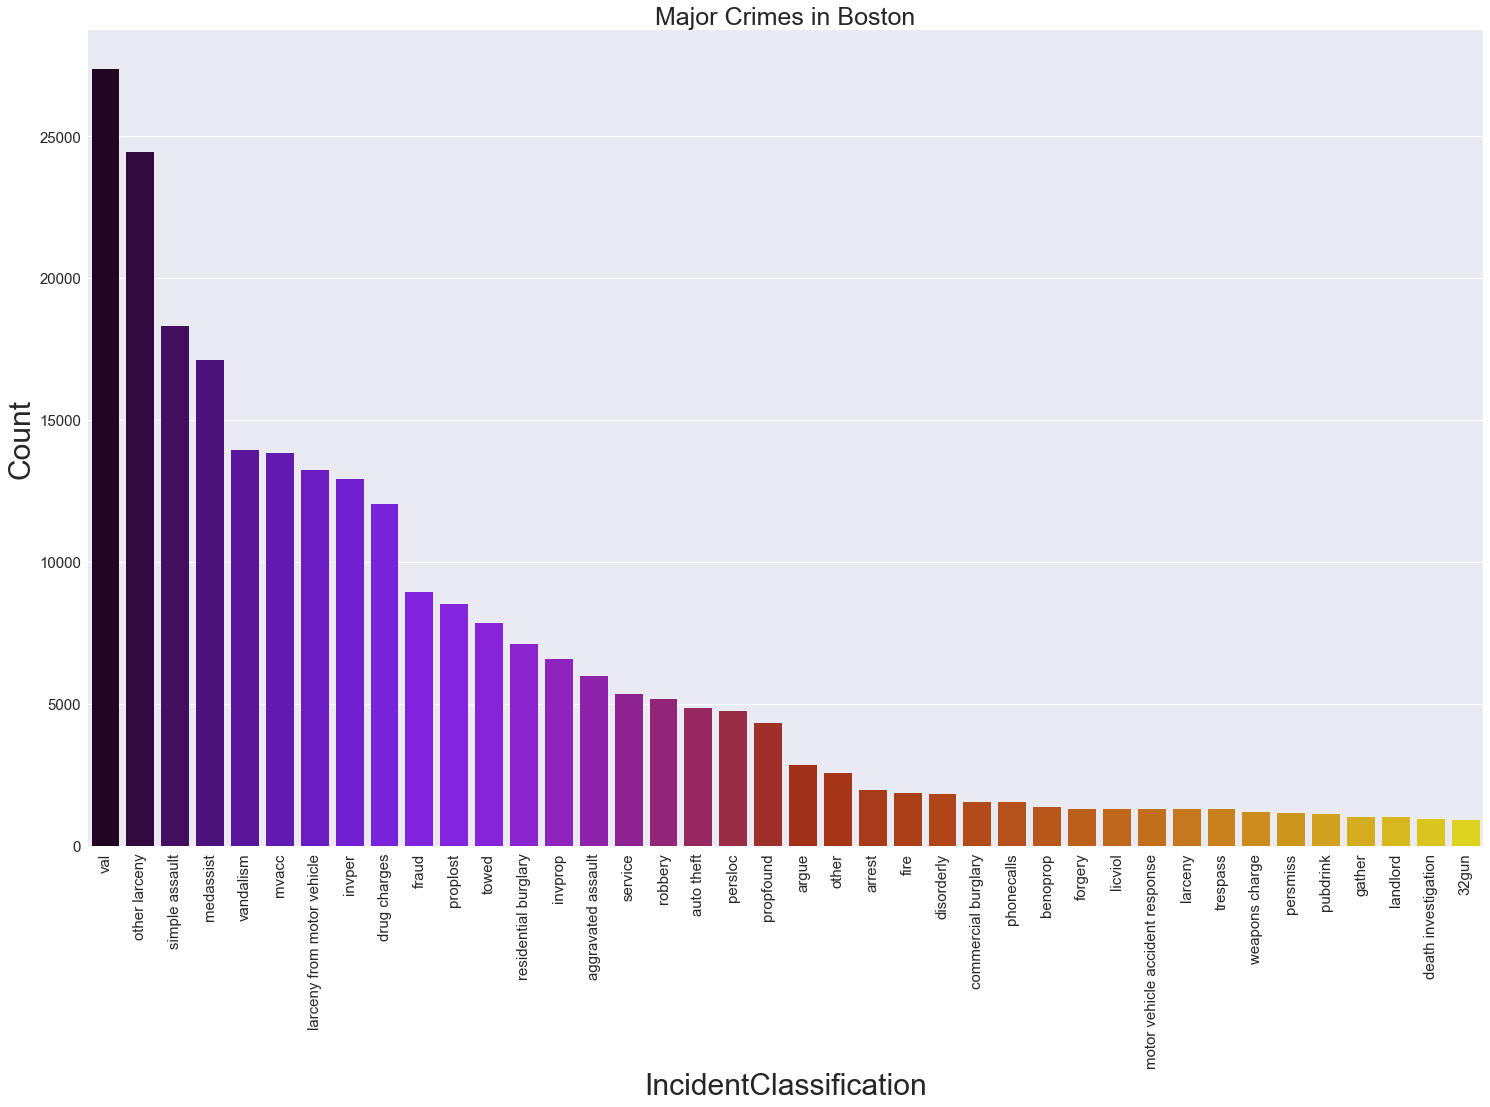

In [17]:
# Top 40 Crimes in Boston

plt.rcParams['figure.figsize'] = (25, 15)

sns.countplot(data['IncidentClassification'], palette = 'gnuplot', order = data['IncidentClassification'].value_counts().iloc[:40].index)
plt.xticks(rotation = 90)
plt.xlabel('IncidentClassification',fontsize= 30)
plt.ylabel('Count',fontsize= 30)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.title('Major Crimes in Boston', fontweight = 35, fontsize = 25)
plt.show()

### Above graph give us the top 40 Crimes reported in Boston throughout all 4 years.

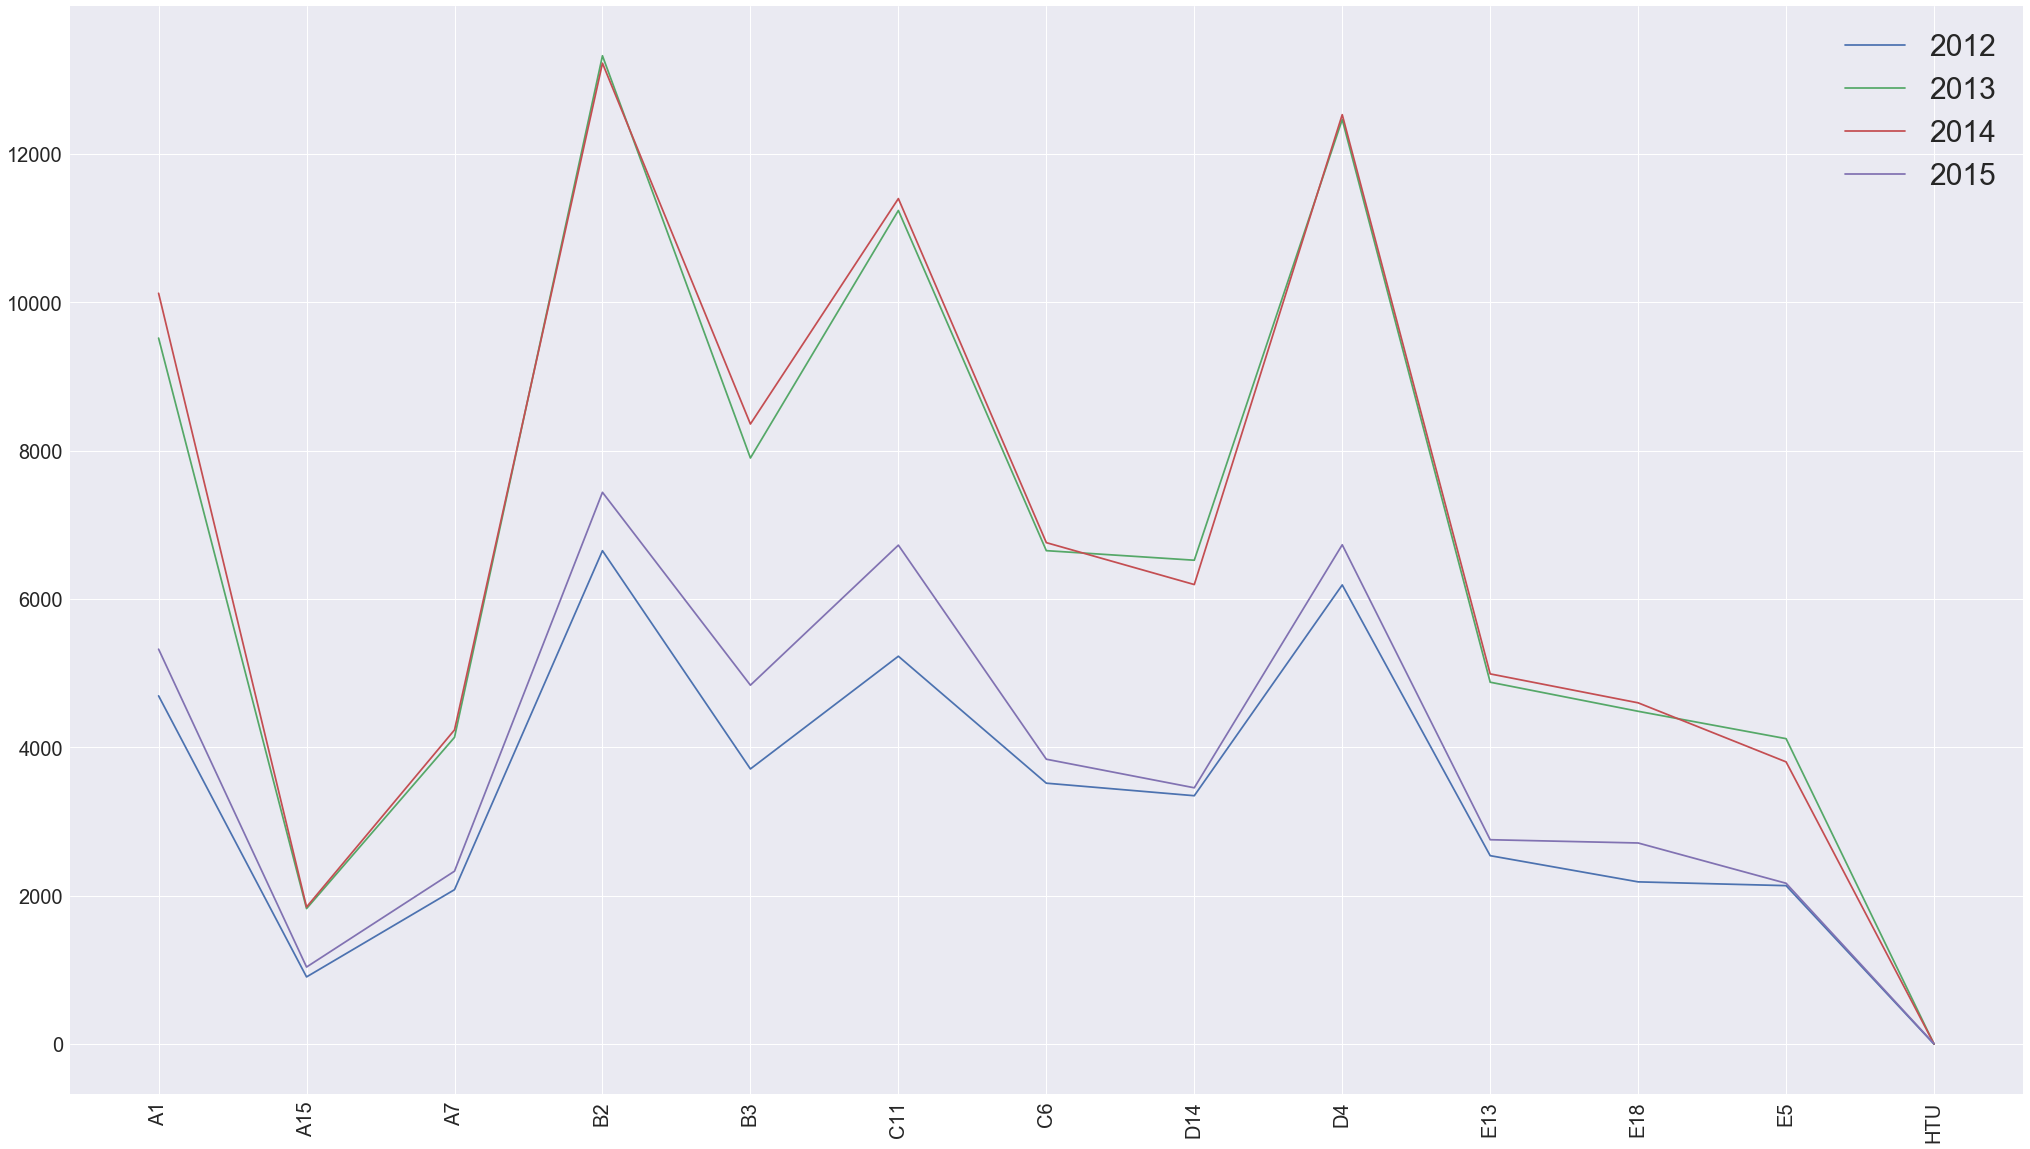

In [18]:
# Trend of crime rate across several District
df = pd.crosstab(data['REPTDISTRICT'], data['Year'])
Year1 = ['2012', '2013', '2014', '2015']
plt.figure(figsize=(35,20))
plt.xticks(rotation = 90)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.plot(df)
plt.legend(Year1, fontsize = 30)
plt.show()

### From the above we can see that maximum number of crime rate is in District "B2" in Year 2013.

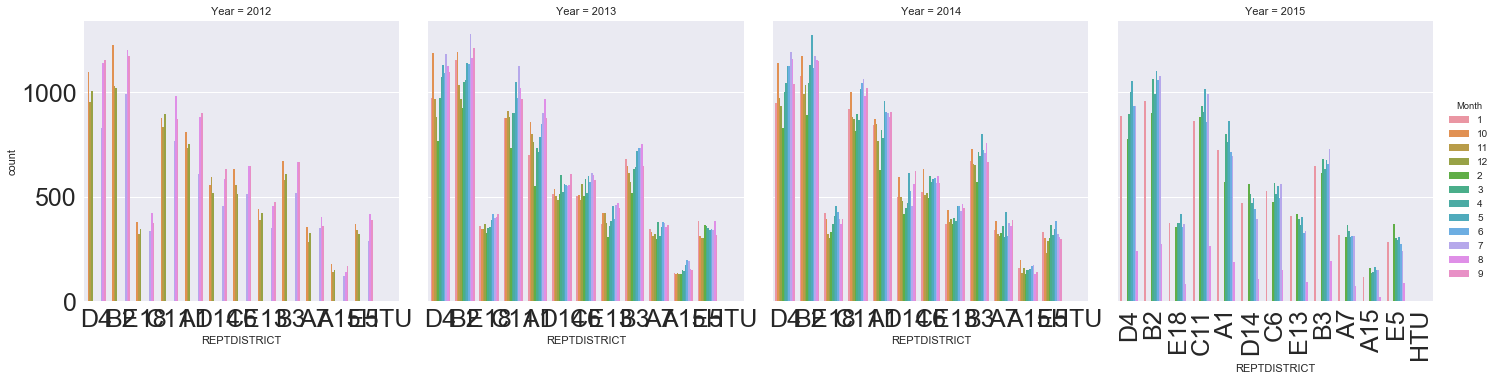

In [19]:
# Crime Reports across the Years with the District
sns.catplot(x="REPTDISTRICT", hue="Month", col="Year", data=data, kind="count")
plt.xticks(rotation = 90)
plt.show()

### From the above graph we can notice that for most of the Districts crime rates are consistent across the years.

# Descriptive Statistics and  Predictive Analysis

- Predicting Incident Classification using KNN

In [20]:
from sklearn.model_selection import train_test_split
# Generating train and test dataset
train_data, test_data = np.split(data.sample(frac=1), [int(.8*len(data))])

In [21]:
print(train_data.head())
print(train_data.shape) 

       ReportNumber NatureCode IncidentClassification  CrimeCode REPTDISTRICT  \
4519      120459309     LARCIP          other larceny       06xx           D4   
216817    142060304     INVEST              medassist  MedAssist           C6   
40890     130066523     FDPROP              propfound  PropFound           B2   
135607    140048037     BERPT           other larceny       06xx           A7   
141043    140108274     IVPER                   fraud       11xx           B2   

       AreaCode                    Date WEAPONTYPE Shooting DOMESTIC SHIFT  \
4519        627  07/25/2012 03:58:00 PM    Unarmed       No       No   Day   
216817        0  12/24/2014 10:11:00 AM    Unarmed       No       No   Day   
40890       289  12/20/2012 08:00:00 AM    Unarmed       No       No   Day   
135607       24  01/24/2014 12:31:00 PM    Unarmed       No       No   Day   
141043      179  02/18/2014 11:50:00 AM    Unarmed       No       No   Day   

        Year Month        Day     UCRPART   

In [22]:
target = train_data["IncidentClassification"].unique()
print(target)

['other larceny' 'medassist' 'propfound' 'fraud' 'simple assault'
 'proplost' 'val' 'invper' 'argue' 'drug charges'
 'larceny from motor vehicle' 'trespass' 'crimes against children'
 'aggravated assault' 'vandalism' 'residential burglary'
 'commercial burglary' 'larceny' 'persloc' 'benoprop' 'mvacc'
 'motor vehicle accident response' 'persmiss' 'license violation'
 'drug violation' 'invprop' 'harass' 'gather' 'operating under influence'
 'landlord/tenant disputes' 'weapons charge' 'verbal disputes' 'other'
 'medical assistance' 'service' 'harbor' 'phonecalls' 'towed'
 'prostitution charges' 'restrain' 'forgery' 'pubdrink' 'robbery'
 'auto theft' 'plates' 'landlord' 'arrest' 'licviol' 'searchwarr'
 'disorderly' 'property found' 'ballist' 'death investigation' 'fire'
 '07rv' 'stolen property charges' 'sex offender registration'
 'investigate person' 'assembly or gathering violations' '32gun'
 'recovered stolen property' 'propdam' 'embezellment'
 'investigate property' 'sexreg' 'prison' 

In [23]:
print(test_data.head())
print(test_data.shape)

       ReportNumber NatureCode IncidentClassification CrimeCode REPTDISTRICT  \
18369     120583274     LARCRT                    val       VAL          A15   
164228    140325560     MVA                     mvacc     MVAcc          C11   
183942    142018023      IVPER               pubdrink  PubDrink           C6   
143092    140123340     MISPER               persmiss  PersMiss           B2   
244593    152034798         BE   residential burglary      05RB           C6   

       AreaCode                    Date WEAPONTYPE Shooting DOMESTIC  SHIFT  \
18369        50  09/17/2012 11:11:00 AM    Unarmed       No       No    Day   
164228      395  05/25/2014 03:51:00 AM    Unarmed       No       No   Last   
183942        0  08/10/2014 05:45:00 PM    Unarmed       No       No  First   
143092      281  02/27/2014 12:00:00 PM    Unarmed       No       No    Day   
244593        0  04/28/2015 05:30:00 PM    Unarmed       No       No  First   

        Year Month       Day   UCRPART      

In [24]:
train_data['Date'] = pd.to_datetime(train_data['Date'], format = '%m/%d/%Y %H:%M:%S %p')
test_data['Date'] = pd.to_datetime(test_data['Date'], format = '%m/%d/%Y %H:%M:%S %p')

In [25]:
# Predicting IncidentClassification using KNN
data_dict = {}
count = 1
for data in target:
    data_dict[data] = count
    count+=1
train_data["IncidentClassification"] = train_data["IncidentClassification"].replace(data_dict)

#Replacing the day of weeks
data_week_dict = {
    "Monday": 1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
train_data["Day"] = train_data["Day"].replace(data_week_dict)
test_data["Day"] = test_data["Day"].replace(data_week_dict)
#District
district = train_data["REPTDISTRICT"].unique()
data_dict_district = {}
count = 1
for data in district:
    data_dict_district[data] = count
    count+=1 
train_data["REPTDISTRICT"] = train_data["REPTDISTRICT"].replace(data_dict_district)
test_data["REPTDISTRICT"] = test_data["REPTDISTRICT"].replace(data_dict_district)
#Shooting
shooting = train_data["Shooting"].unique()
data_dict_shooting = {}
count = 1
for data in shooting:
    data_dict_shooting[data] = count
    count+=1 
train_data["Shooting"] = train_data["Shooting"].replace(data_dict_shooting)
test_data["Shooting"] = test_data["Shooting"].replace(data_dict_shooting)
#Weapon Type
weapon = train_data["WEAPONTYPE"].unique()
data_dict_weapon = {}
count = 1
for data in weapon:
    data_dict_weapon[data] = count
    count+=1 
train_data["WEAPONTYPE"] = train_data["WEAPONTYPE"].replace(data_dict_weapon)
test_data["WEAPONTYPE"] = test_data["WEAPONTYPE"].replace(data_dict_weapon)

In [26]:
print(train_data.head())

       ReportNumber NatureCode  IncidentClassification  CrimeCode  \
4519      120459309     LARCIP                       1       06xx   
216817    142060304     INVEST                       2  MedAssist   
40890     130066523     FDPROP                       3  PropFound   
135607    140048037     BERPT                        1       06xx   
141043    140108274     IVPER                        4       11xx   

        REPTDISTRICT AreaCode                Date  WEAPONTYPE  Shooting  \
4519               1      627 2012-07-25 03:58:00           1         1   
216817             2        0 2014-12-24 10:11:00           1         1   
40890              3      289 2012-12-20 08:00:00           1         1   
135607             4       24 2014-01-24 12:31:00           1         1   
141043             3      179 2014-02-18 11:50:00           1         1   

       DOMESTIC SHIFT  Year Month  Day     UCRPART            X            Y  \
4519         No   Day  2012     7    3    Part One  76

In [27]:
columns_train = train_data.columns
print(columns_train)
columns_test = test_data.columns
print(columns_test)

Index(['ReportNumber', 'NatureCode', 'IncidentClassification', 'CrimeCode',
       'REPTDISTRICT', 'AreaCode', 'Date', 'WEAPONTYPE', 'Shooting',
       'DOMESTIC', 'SHIFT', 'Year', 'Month', 'Day', 'UCRPART', 'X', 'Y',
       'STREETNAME', 'XSTREETNAME', 'Location'],
      dtype='object')
Index(['ReportNumber', 'NatureCode', 'IncidentClassification', 'CrimeCode',
       'REPTDISTRICT', 'AreaCode', 'Date', 'WEAPONTYPE', 'Shooting',
       'DOMESTIC', 'SHIFT', 'Year', 'Month', 'Day', 'UCRPART', 'X', 'Y',
       'STREETNAME', 'XSTREETNAME', 'Location'],
      dtype='object')


In [28]:
# Removing unnecessary variables from train and test datasets
cols_train = columns_train.drop(["ReportNumber","XSTREETNAME"])
print(cols_train)

cols_test = columns_test.drop(["ReportNumber","XSTREETNAME"])
print(cols_test)

Index(['NatureCode', 'IncidentClassification', 'CrimeCode', 'REPTDISTRICT',
       'AreaCode', 'Date', 'WEAPONTYPE', 'Shooting', 'DOMESTIC', 'SHIFT',
       'Year', 'Month', 'Day', 'UCRPART', 'X', 'Y', 'STREETNAME', 'Location'],
      dtype='object')
Index(['NatureCode', 'IncidentClassification', 'CrimeCode', 'REPTDISTRICT',
       'AreaCode', 'Date', 'WEAPONTYPE', 'Shooting', 'DOMESTIC', 'SHIFT',
       'Year', 'Month', 'Day', 'UCRPART', 'X', 'Y', 'STREETNAME', 'Location'],
      dtype='object')


In [29]:
train_data_new = train_data[cols_train]
print(train_data_new.head())

       NatureCode  IncidentClassification  CrimeCode  REPTDISTRICT AreaCode  \
4519       LARCIP                       1       06xx             1      627   
216817     INVEST                       2  MedAssist             2        0   
40890      FDPROP                       3  PropFound             3      289   
135607     BERPT                        1       06xx             4       24   
141043     IVPER                        4       11xx             3      179   

                      Date  WEAPONTYPE  Shooting DOMESTIC SHIFT  Year Month  \
4519   2012-07-25 03:58:00           1         1       No   Day  2012     7   
216817 2014-12-24 10:11:00           1         1       No   Day  2014    12   
40890  2012-12-20 08:00:00           1         1       No   Day  2012    12   
135607 2014-01-24 12:31:00           1         1       No   Day  2014     1   
141043 2014-02-18 11:50:00           1         1       No   Day  2014     2   

        Day     UCRPART            X            Y 

In [30]:
print(train_data_new.describe())

       IncidentClassification   REPTDISTRICT     WEAPONTYPE       Shooting  \
count           214119.000000  214119.000000  214119.000000  214119.000000   
mean                16.893326       5.619749       1.434296       1.002611   
std                 16.944711       3.368398       0.899153       0.051028   
min                  1.000000       1.000000       1.000000       1.000000   
25%                  5.000000       3.000000       1.000000       1.000000   
50%                 10.000000       6.000000       1.000000       1.000000   
75%                 21.000000       8.000000       2.000000       1.000000   
max                114.000000      13.000000       8.000000       2.000000   

                 Day  
count  214119.000000  
mean        3.970395  
std         1.970200  
min         1.000000  
25%         2.000000  
50%         4.000000  
75%         6.000000  
max         7.000000  


In [31]:
# Calculated correlation between "IncidentClassification" with other variables
corr = train_data_new.corr()
print(corr["IncidentClassification"])

IncidentClassification    1.000000
REPTDISTRICT             -0.010940
WEAPONTYPE                0.221684
Shooting                  0.025319
Day                      -0.010693
Name: IncidentClassification, dtype: float64


In [32]:
# Finding skewness
skew = train_data_new.skew()
print(skew)

IncidentClassification     1.538626
REPTDISTRICT               0.259184
WEAPONTYPE                 2.643421
Shooting                  19.494802
Day                       -0.005693
dtype: float64


In [33]:
# Fitting the model to predict "IncidentClassification"
features = ["Day", "REPTDISTRICT", "Shooting", "WEAPONTYPE"]
X_train = train_data[features]
y_train = train_data["IncidentClassification"]
X_test = test_data[features]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [34]:
from collections import OrderedDict
data_dict_new = OrderedDict(sorted(data_dict.items()))
print(data_dict_new)

OrderedDict([('07rv', 55), ('32gun', 60), ('aggravated assault', 14), ('aircraft', 104), ('argue', 9), ('arrest', 47), ('arson', 88), ('assembly or gathering violations', 59), ('auto theft', 44), ('auto theft recovery', 90), ('ballist', 52), ('ballistics', 84), ('benoprop', 20), ('biothreat', 107), ('bomb', 81), ('bomb hoax', 113), ('burgtools', 86), ('commercial burglary', 17), ('confidence games', 70), ('counterfeiting', 80), ('crimes against children', 13), ('criminal harassment', 97), ('death investigation', 53), ('disorderly', 50), ('disorderly conduct', 78), ('drug charges', 10), ('drug violation', 25), ('embezellment', 63), ('embezzlement', 101), ('evading fare', 109), ('explos', 73), ('explosives', 114), ('fire', 54), ('fire related reports', 75), ('firearm discovery', 110), ('firearm violations', 95), ('forgery', 41), ('fraud', 4), ('gambling offense', 106), ('gather', 28), ('harass', 27), ('harbor', 36), ('harbor related incidents', 112), ('hatecrim', 83), ('hazardous', 76), 

In [35]:
# Predicted Values
preds = pd.DataFrame(predictions)
preds

,0
0,11
1,1
2,7
3,11
4,5
5,7
6,5
7,11
8,10
9,4


### Above dataframe consists of predicted values of "Incident Type Description".